# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.7.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.7 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment4 using this file format:</u> <b>Yourfirstname_lastname_Assignment4.ipynb. Marks might be deducted if you do not follow the submission steps</b> 

#### <b>This assignment is out of 125</u> 
#### <b>Deadline</b>: <u>Friday, Nov-13-2020 11:59 PM.</u> 

# Assignment 4

In [1]:
# Always import all needed libraries in your first code cell
import numpy as np
import matplotlib.pyplot as plt
from Dataset import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

%matplotlib inline

# Planar data classification

In this assignment you will learn how to:
- Build a Multi layer perceptron neural network.
- Implement forward propagation.
- Implement backpropagation. (to be sent later)
- Test debugging skills for your neural network. (to be sent later)

<br>

Hint: Always use vectorized data when possible. It will save you time and the code will run much faster.

## Loading dataset

The following line will load your "flower" dataset. The feature space is two dimensional and the classification is binary.

In [2]:
features, labels = load_planar_dataset()

### Question 1 - 5 points
Visualize the data from the dataset (using your favorite visualization library) and separate the two classes by color. The data should look like a "flower". The goal of this assignment is to build a model that will tell the class of a given data point.

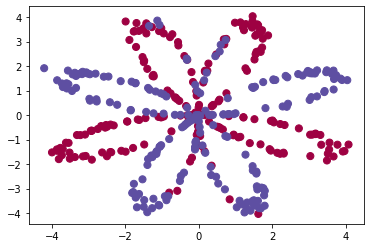

In [3]:
plt.scatter(features[0,:], features[1,:], c=labels, s=50, cmap=plt.cm.Spectral)

### Question 2 - 5 points

Before diving deep, lets try to get a better sense of what our data looks like. <br>
- What is the shape of our features?<br>
- What is the shape of our labels?<br>
- How many training examples do you have? 



In [4]:
shape_X = features.shape
shape_Y = labels.shape
m = features.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have %d training sample!' % (m))

# The shape of X should be: (2, 400)
# The shape of Y is: (1, 400)
# you should have 400 training sample!

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have 400 training sample!


## Question 3 - 5 points
Since we are doing binary classification, lets give it try with logistic regression to create a baseline model. <br>
Use Sklearn's built-in LogisticRegression classifier (with no polynomials) and report the accuracy score. <br>
Hint: Accuracy will be around 50%, do cross validation with cv=3 for testing ...

In [ ]:
X_train, X_test, y_train, y_test = #write your code here and below

## Question 4 - 5 points
Plot the decision boundary of the model.

In [ ]:
from Dataset import plot_decision_boundary
# Use the plot_decision_boundary function
# Reminder: you must pass the clf.predict function as the first paramter
# Write code here 


## Question 5 - 5 points

Do you know the reason of poor performance of logistic regression?
Can you explain it briefly?

<i>Write your answer here</i>

## Neural Network model

As you can see, logistic regression did rather poorly. We need to switch from traditional binary classification algorithms to a multi-layer perceptron (Hopefully this will help). 

Build a neural network with one hidden layer to see if it can perform better than the logistic regression. 
For your convenience, a diagram and the mathematical formulas of the network you will build are given below:

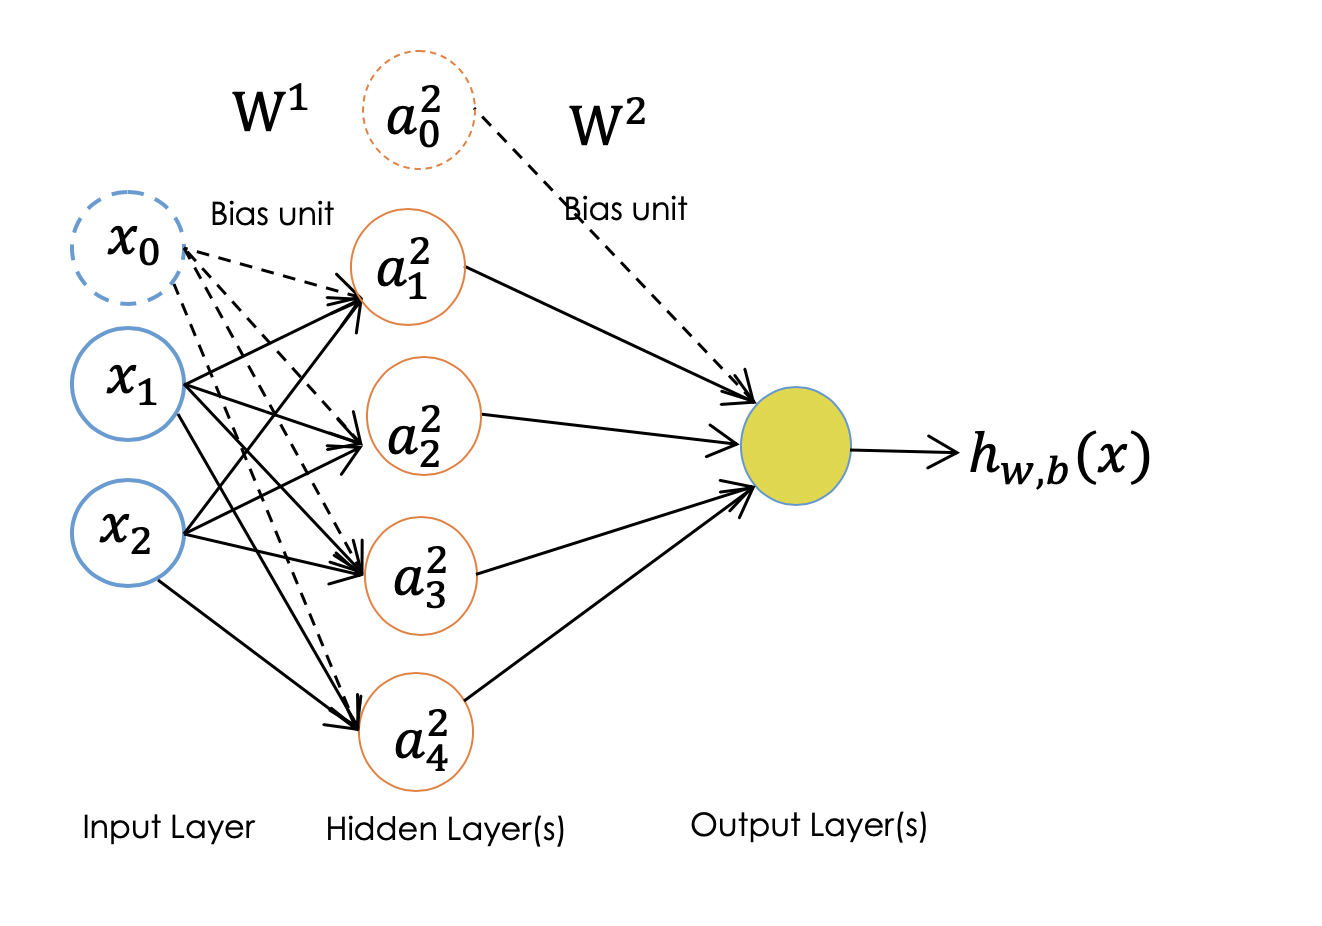


### Mathematically:


$$a^{(1)} =  X \tag{1}$$
$$z^{(2)} =  W^{1} a^{(1)} \tag{2}$$ 
$$a^{(2)} = g(z^{(2)}) + a^{(2)}_{0}\tag{3}$$
$$z^{(3)} = W^{2} a^{(2)}\tag{4}$$
$${h}_{(w)}(X) = a^{(3)} = g(z^{ (3)})\tag{5}$$

Given the predictions on all the examples, you can also compute the cost (cross-entropy cost in this case) $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{(3) (i)}\right) + (1-y^{(i)})\log\left(1- a^{(3) (i)}\right)  \large  \right) \small \tag{6}$$

Note that X could contain more than one example, X's dimension is the (num_features) * (num_samples).<br><br>
### High Level Network Instructions
To build a neural network, you need the following building blocks beforehand:
1. Layer definition
2. Initialization of parameters
3. Forward propagation
4. Cost computation
5. Backward propagation
6. Update of parameters from gradient

<br>The building blocks will be explained as we go along in the assignment. For the released Part 1 you will implement the 1-4 blocks.  

First, we are going to build a three layer MLP network. In this step, you must define the sizes of your layers. These sizes are determined by the input and output space of your network (as detailed in course notes). The size of your hidden layer can be set to four nodes for now.<br><br> Define three variables named:<br>- input_layer_size (the size of the input layer)<br>- hidden_layer_size (the size of the hidden layer)<br>- output_layer_size (the size of the output layer)

In [ ]:
def layerSizes(X):
    """
    X -- input data
    """
    input_layer_size = X.shape[0]
    hidden_layer_size = 4
    output_layer_size = 1
    
    """
    Returns:
    input_layer_size -- the size of the input layer
    hidden_layer_size -- the size of the hidden layer
    output_layer_size -- the size of the output layer
    """
    
    return input_layer_size, hidden_layer_size, output_layer_size

In [ ]:
input_layer_size, hidden_layer_size, output_layer_size = layerSizes(features)
print("The size of the input layer is: " + str(input_layer_size))
print("The size of the hidden layer is: " + str(hidden_layer_size))
print("The size of the output layer is: " + str(output_layer_size))


## Question 6 - 10 points
You need to initialize neural network with random values. Implement the initialize_parameters function.

Hint:Initialize the weights matrices with random values .

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    input_size-- size of the input layer
    hidden_size -- size of the hidden layer
    output_size-- size of the output layer
    """
    np.random.seed(2)  # you can pick any seed in this case
    
    Weight1 = np.random.rand(#Write your code here, #Write your code here) 
    Weight2 = np.random.rand(#Write your code here, #Write your code here) 
    
    parameters = {'Weight1': Weight1, 'Weight2': Weight2}
    
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix 1
                    W2 -- weight matrix 2 
    """
    return parameters

In [ ]:
parameters = initialize_parameters(*layerSizes(features))
print("Weight1 = " + str(parameters["Weight1"].shape))
print("Weight2 = " + str(parameters["Weight2"].shape))

#Your answer should match what you learned in the class, slide #26-28 of ANN basics lecture.

## Question 7 - 15 points

 In this part forward propagation will be implemented. It will propagate the gradient in the forward pass from one layer to another.

At first,look at the mathematical representation of the classifier.For this assignment we are asking you to use <b>tanh</b> for the hidden layer and <b>sigmoid</b> for the output layer. (For neural network in general you can use any non-linear activation function, you might try at some point to change those and see if you can achieve better accuracy)

Then, do the following:

Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters function) by using parameters dictionary.

Implement Forward Propagation. Compute $z^{(2)}, a^{(2)}, z^{(3)}$ and $a^{(3)}$ (the vector of all your predictions on all the examples in the training set).


In [ ]:
def forward_prop(X, parameters):
    """
    X -- input data
    parameters -- python dictionary containing your parameters (output of initialization function)
    """
    # Retrieve each parameter from the dictionary "parameters"
    Weight1 = parameters['Weight1'] 
    Weight2 = parameters['Weight2'] 
    
   
    # Add bias term to X
    one=np.ones(X.shape[1])  
    X=np.vstack ((one, X) ) #Adding ones as bias
  
    # Compute pass from layer 1 to layer 2 and activation
    z2 = #Write your code here
    a2 = #Write your code here
    
    # add bias term to a2
    one = #Write your code here
    a2  = #Write your code here to add ones just like we did in X
    
    # Compute pass from layer 2 to layer 3 and activation
    z3 = #Write your code here
    a3 = #Write your code here
    
    
    #The values will be needed for the backpropagation which are stored in cache. Later, it will be given to back propagation.
    cache = {"z2": z2,
             "a2": a2,
             "z3": z3,
             "a3": a3}
    """
    Returns:
    a3 -- The sigmoid output of the second activation
    cache -- a dictionary containing "z2", "a2", "z3" and "a3"
    """
    return np.array(a3), cache

### Test forward propagation functionality
In class, we only fed one sample to our neural net as input at a time. her your matrix math is done correctly, you are able to feed multiple sample to your network. Lets try it out.

In [ ]:
# Create random seed of 1 and test input data 
np.random.seed(1) 
X_test = np.random.randn(2, 2)

# Use these weights in order to obtain the desired output
parameters = {
    'Weight1': 
        np.array([
            [-0.00416758, -0.00056267,-0.00056127],
            [-0.02136196,  0.01640271,-0.00056123],
            [-0.01793436, -0.00841747,-0.00036123],
            [ 0.00502881, -0.01245288,-0.00026117]
        ]),
     'Weight2': 
        np.array([
             [-0.01057952, -0.00909008,  0.00551454,  0.02292208,0.02292223]
     ])
}


a3, cache = forward_prop(X_test, parameters)

# Note: we use the mean function to simplify the process of identifying mathing output.
print("Your output:\n",np.mean(cache['z2']), np.mean(cache['a2']), np.mean(cache['z3']), np.mean(cache['a3']))

# Desired output:
#-0.00989624831022699 0.19208511191331104 -0.011139109844842423 0.4972152514624493

You have computed  $a^{(3)}$ (in the Python variable "`a3`"), which contains $a^{(3)(i)}$ for every example. You will need these values to compute cost as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{(3) (i)}\right) + (1-y^{(i)})\log\left(1- a^{(3) (i)}\right) \large{)} \small\tag{7}$$

## Question 8 - 15 points 
 Implement compute_cost() to compute the value of the cost $J$.

In [ ]:
def compute_cost(a3, Y):
     """
    Computes the cross-entropy cost given in equation (7) or in other way you may want.
    
    Arguments:
    a3 -- The sigmoid output of the second activation
    Y -- "true" labels vector of shape 
    
    """
    m =  #Write your code here  # number of example

    # Compute the cross-entropy cost
    logprobs = #Write your code here following equation #7
    cost = -1/m*np.sum(logprobs) 

    ### Remember that, if you want to use different cross-entropy loss, you need to change logprobs and cost accordingly
    cost = float(np.squeeze(cost))
    
    return cost

In [ ]:
# test function for compute_cost
np.random.seed(1) 
Y_true = np.random.randn(1, 3)

a3 = np.array([ 0.5002307,  0.49985831,  0.50023963])
print("Your output:\ncost =", compute_cost(a3, Y_true))

# Desired output:
# cost = 0.6929198937761264

## Question 9 - 15 points 
Back propagation is one of the most crucial parts of building our network. The following will implement ONE back propagation iteration (You can perform full batch updates by feeding all of your samples in as X). Now Implement the backward_propagation function.
Mathematical formula's are given below for your convenience.<br><br>Remember that you need to find the derivative of any weight with respect to the cost function. Then, multiply it with the activation function in order to update using the GD algorithm. In the code we will use d as a shorthand of delta.

 
 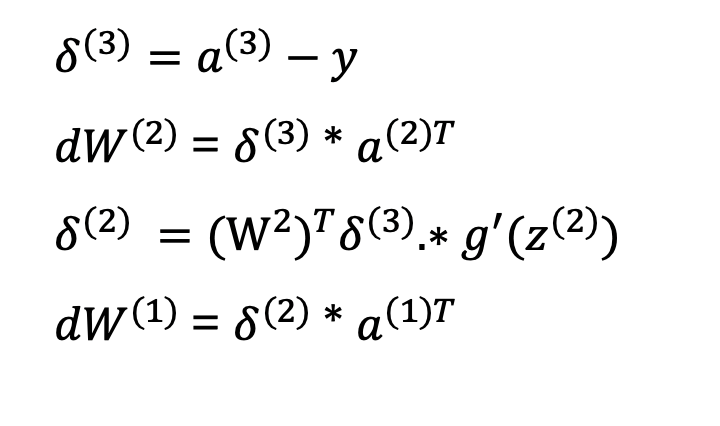
 
<br>Hint:<br>- To compute d2 you'll need to compute $g^{(2)'}(z^{(2)})$.  <br>- Remember that you have two different activation functions.<br>- Derivative of tanh(x) = 1 - $tanh(x)^2$

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    """
    parameters -- dictionary containing weights 
    cache -- a dictionary containing "z2", "a2", "z3" and "a3".
    X -- input data
    Y -- "true" labels vector 
    """
    m = X.shape[1]
    
    # Copy W1 and W2 from the dictionary "parameters"
    Weight1 = parameters['Weight1']
    Weight2 = parameters['Weight2']
    
    # Append ones column
    one = np.ones(X.shape[1])
    X = np.vstack((one, X))
    
    # Copy A1 and A2 from dictionary "cache".
    z2 = cache['z2'] 
    a2 = cache['a2'] 
    a3 = cache['a3'] 
    
    #  calculate d3, dW2. 
    d3 = #Write your code here
   
    dW2 = #Write your code here
    
    #Below we will calculate delta 2. In the hidden layer,we have bias which we will exclude as it is not going backward.
    #We will be using tanh were as an activation function
    
    d2 = Weight2.T @ d3
    d2 = d2[1:] #We need to exclude the bias as it is not backpropagating.
    
    d2 = d2 * (1 - np.power(np.tanh(z2), 2))
    
    dW1 = d2 @ X.T 
    
    #in the gradient dict we will keep the update for the weight vectors.
    
    gradient = {"dW1" : 1 / m * dW1,
                "dW2" : 1 / m * dW2}
    
    return gradient

In [ ]:
# Test function for backward propagation
np.random.seed(1) 
X_test = np.random.randn(2, 1)
Y_test = np.random.randn(1, 1)

parameters = {
    'Weight1': 
        np.array([[-0.00416758, -0.00056267, -0.0005612345],
                  [-0.02136196,  0.01640271, 0.0005612343],
                  [-0.01793436, -0.00841747, -0.0005612365],
                  [ 0.00502881, -0.01245288, -0.0005211234]]),
    'Weight2': 
        np.array([[-0.01057952, -0.00909008, 0.00551432, 0.00551454, 0.02292208]])
}

cache = {
    'z2': np.array([[-0.00616586],
                    [-0.05229879],
                    [-0.02009991],
                    [0.02153007]]),
    'a2': np.array([[1],
                    [-0.05225116],
                    [-0.02009721],
                    [0.02152675],
                    [0.02152675]]),
    'z3': np.array([[ 0.00092281]]),
    'a3': np.array([[ 0.5002307]])  
}

grads = backward_propagation(parameters, cache, X_test, Y_test)

print ("dW1 = " + str(grads["dW1"]))
print ("dW2 = " + str(grads["dW2"]))

# Desired Output:

# dW1 = [[-0.00934791 -0.01518423  0.00571864]
#  [ 0.00565546  0.00918642 -0.00345976]
#  [ 0.00566888  0.00920821 -0.00346797]
#  [ 0.0235622   0.03827315 -0.01441433]]
# dW2 = [[ 1.02840245 -0.05373522 -0.02066802  0.02213816  0.02213816]]

## Question 10 - 15 points 
The update rule will allow us to update our weights and pass our gradient through the network.
Now, Implement the update rule using your known gradients. 

In [ ]:
def update_parameters(parameters, grads, learning_rate = 0.5):
    """
    parameters -- dictionary containing network weights 
    grads -- dictionary containing gradients 
    learning_rate -- learning rate for gradient update
    """
    # Copy the following parameter from the dictionary "parameters"
    Weight1 = parameters['Weight1'] 
    Weight2 = parameters['Weight2'] 
     
    # Copy each gradient from the dictionary "grads"
    dW1 = #Write your code here
    
    dW2 = #Write your code here
    
    # Update rule for each parameter
    
    Weight1 = #Write your code here to update Weight1 based on dW1 (based on GD algorithm)
    Weight2 = #Write your code here to update Weight2 based on dW1 (based on GD algorithm)

    
    parameters = {"Weight1": Weight1,
                  "Weight2": Weight2}
    
    """
    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    return parameters

In [ ]:
# test function update_parameters
np.random.seed(1) 

parameters = {
    'Weight1':
        np.array([[-0.00416758, -0.00056267, -0.00056127],
                  [-0.02136196, 0.01640271, -0.00056123],
                  [-0.01793436, -0.00841747, -0.00036123],
                  [0.00502881, -0.01245288, -0.00026117],]),
    'Weight2': 
        np.array([[-0.01057952, -0.00909008, 0.00551454, 0.02292208, 0.02292223]])
}

grads = {
    'dW1': 
        np.array([[0.00023322, -0.00205423, -0.00205423],
                  [0.00082222, -0.00700776, -0.00205423],
                  [-0.00031831, 0.0028636, -0.00205423 ],
                  [-0.00092857, 0.00809933, -0.00205423]]),
    'dW2': 
        np.array([[-1.75740039e-05, 3.70231337e-03, -1.25683095e-03, -2.55715317e-03, -2.55715317e-03]])
}

parameters = update_parameters(parameters, grads)

print("Weight1 = " + str(parameters["Weight1"]))
print("Weight2 = " + str(parameters["Weight2"]))


# Desired Output:

# Weight1 = [[-0.00428419  0.00046445  0.00046585]
#   [-0.02177307  0.01990659  0.00046589]
#   [-0.0177752  -0.00984927  0.00066589]
#   [ 0.00549309 -0.01650255  0.00076595]
# Weight2 = [[-0.01057073 -0.01094124  0.00614296  0.02420066  0.02420081]]

## Question 11 - 15 points 

The previously mentioned building blocks are now complete. It is time to put it all together. Implement a functioning neural network model given the various functions created above.

In [ ]:
def model(X, Y, n_h, num_epochs=1000, learning_rate=0.1, print_cost=True):
    """
    X -- dataset
    Y -- labels
    n_h -- number of hidden layers
    learning_rate -- Percent of gradient update used
    num_epochs -- Number of iterations in gradient descent
    print_cost -- if True, print cost every 100 iterations
    
    Returns:
    parameters -- parameters learnt by the model
    """
    
    n_x = X.shape[0]
    n_y = len(np.unique(Y))
    
    if n_y <= 2:
        n_y = 1
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y) # Write your code here
    Weight1 = parameters['Weight1']
    
    Weight2 = parameters['Weight2']
   
    
    # gradient descent
    

    for i in range(0, num_epochs):
         
        # Call the Forward propagation with X, and parameters.
        
        a3, cache = #Write your code here
        
        # Call the Cost function with a3, Y and parameters.
        
        cost = # Write your code here
        
        # Call Backpropagation with Inputs, parameters, cache, X and Y.
        grads = # Write your code here
        
        # Update gradient descent parameter with  parameters and grads and learning rate.
        parameters = # Write your code here
 
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters # refer to the code in the second next cell to run your model code

## Question 12 - 15 points

Now, you have the model in your hand. It is time to use it and see it in action. Use the model to predict using the function named predict and also plot the decision boundary

Hint: Use forward propagation to predict results.


In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    parameters -- dictionary containing your weights 
    X -- input data
    
    Returns
    predictions -- vector of model predictions (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    a3, cache = # add your code here 
    predictions = (a3 > 0.5)
    
    return predictions

In [ ]:
# Build a model with a n_h-dimensional hidden layers
parameters = model(features, labels, 4, num_epochs=15000)

# plot the decision boundary
plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel())

Now, run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

In [ ]:
# Print accuracy
predictions = predict(parameters, features)
print('Accuracy: %d' % float((np.dot(labels, predictions.T) + np.dot(1-labels, 1-predictions.T)) / float(labels.size) * 100) + '%')

# Expected output:
# Accuracy: 88%

As you can see, this accuracy is very high compared to that of Logistic Regression. The model learns the pattern of the leaves as desired. Unlike logistic regression, neural networks are able to learn even highly non-linear decision boundaries (as demonstrated above).


# Grad Student or Undergrad Extra Credit

## Question 13 -- 15 points

Try out several hidden layers to see how this hyper-parameter effects accuracy.
Run the following code (It may take 1-2 minutes), and observe the different behaviors of the model for various hidden layer sizes.

In [ ]:
# This may take about 2 minutes to run
plt.figure(figsize=(16, 32))
hidden_layer_sizes = 10
for i, n_h in enumerate(range(hidden_layer_sizes)):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    
    parameters = model(features, labels, n_h) 
    plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel()) 
    
    predictions = predict(parameters, features) 
    accuracy = float((np.dot(labels, predictions.T) + np.dot(1-labels, 1-predictions.T))/float(labels.size)*100) #Write your code here
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

## Question 14 -- 5 points

Do you think that the model is overfitting? What is the layer size for hidden layer? Why do you think so?

## Question 15 -- 5 points

Play with the learning_rate and explain how this changes performance.